In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report

In [27]:
df = pd.read_csv("../data/feature_selected.csv")
df = df.drop('Unnamed: 0', axis=1)

### Split the dataset into training (80%) and testing (20%) sets.

In [28]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1].astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [29]:
y.unique()
# We can see we can deal with it as labels
# it is floats as it is scaled
# converted to string to deal with it as labels as Logistic regression throws error

array(['-0.8484547210461874', '0.9865752570304503', '0.0690602679921315',
       '1.9040902460687688', '2.8216052351070884'], dtype=object)

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=42, penalty='l1', solver='liblinear')
log.fit(X_train, y_train)

logistic_pre = log.predict(X_test)

train_acc = accuracy_score(y_train, log.predict(X_train))
test_acc = accuracy_score(y_test, logistic_pre)
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 0.585949177877429
Test accuracy: 0.6428571428571429


We can see there are a little underfitting

When applied Lasso Regression the accuracy increased by 0.01

### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

dst = DecisionTreeClassifier(random_state=42)
dst.fit(X_train, y_train)

dst_pre = dst.predict(X_test)

train_acc = accuracy_score(y_train, dst.predict(X_train))
test_acc = accuracy_score(y_test, dst_pre)
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 1.0
Test accuracy: 0.5119047619047619


We can see that here we have overfitting

We can solve this by using cross validation

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pre = rf.predict(X_test)

train_acc = accuracy_score(y_train, rf.predict(X_train))
test_acc = accuracy_score(y_test, rf_pre)
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 1.0
Test accuracy: 0.625


The results is more better than Decision tree but still have overfitting

### Support Vector Machine (SVM)

In [33]:
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train, y_train)

svc_pre = svc.predict(X_test)

train_acc = accuracy_score(y_train, svc.predict(X_train))
test_acc = accuracy_score(y_test, svc_pre)
print(f"Train accuracy: {train_acc}")
print(f"Test accuracy: {test_acc}")

Train accuracy: 0.6576980568011959
Test accuracy: 0.6428571428571429


<Axes: xlabel='Model'>

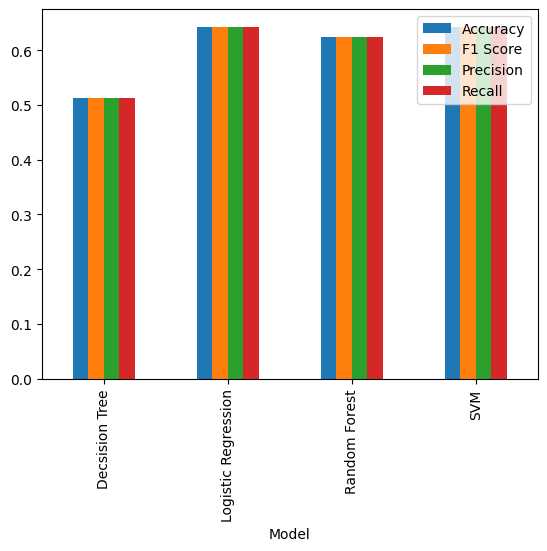

In [35]:
df2 = pd.DataFrame({
  'Model': ['Logistic Regression', 'Decsision Tree', 'Random Forest', 'SVM'],
  'Recall': [
    recall_score(y_test, logistic_pre, average='micro'), 
    recall_score(y_test, dst_pre, average='micro'),
    recall_score(y_test, rf_pre, average='micro'),
    recall_score(y_test, svc_pre, average='micro'),
    ],
  'Precision': [
    precision_score(y_test, logistic_pre, average='micro'), 
    precision_score(y_test, dst_pre, average='micro'),
    precision_score(y_test, rf_pre, average='micro'),
    precision_score(y_test, svc_pre, average='micro'),
    ],
  'F1 Score': [
    f1_score(y_test, logistic_pre, average='micro'), 
    f1_score(y_test, dst_pre, average='micro'),
    f1_score(y_test, rf_pre, average='micro'),
    f1_score(y_test, svc_pre, average='micro'),
    ],
  'Accuracy': [
    accuracy_score(y_test, logistic_pre), 
    accuracy_score(y_test, dst_pre),
    accuracy_score(y_test, rf_pre),
    accuracy_score(y_test, svc_pre),
    ],
})

pv = df2.pivot_table(index='Model')
pv.plot(kind='bar')

ROC Curve & AUC Score